## Statistics and Data Science 2 (Python)

# Final Project 

### Group: write your group

## Task 1 (Classification with prepared dataset (70% of mark)):
### Background information: 
We are constantly working to improve the quality of our products and services to grow our subscriber base and minimize churn. In our work we use a personal approach to subscribers.

To reduce churn, the company uses different channels of communication with customers. Each proposal must be addressed to a specific target group. In this task, you will have to use the available data to try to identify subscribers who will churn.


### Dataset details
Anonymized data about subscribers: subscriber service language, tariff plan, information on the volume of consumption of various operator services and others.

The **churn_rate_train.csv** file contains information to build the model.

Row format: 
- 3 categorical features (C1, C2, C3)
- 23 numeric features (N1, ..., N23) 
- the target variable - TARGET


### Task
Describe the stages of building a model, build a model, evaluate it and tell the business how to apply it, that is, a business interpretation is needed.

*Note: this is how the task was originally structured, you can use it as a guidance.*



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

C:\Users\Админ\AppData\Local\Temp\ipykernel_21328\95090682.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# This is your dataset for training
df_train = pd.read_csv('churn_train.csv')
df_train.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3234373639353330,313434,33,231.21,727.20,0.00,430.02,218.10,15.85,50.23,...,33,8,4,124,29,132,33,0,0,0
1,3430333334383330,343835,33,0.15,115.91,3565.02,268.58,156.62,0.00,59.07,...,134,0,47,232,87,232,134,0,0,0
2,3439383237353231,343636,33,66.29,1137.81,93.33,0.00,41.78,0.00,0.38,...,13,0,1,0,12,0,13,0,0,0
3,3339353736373733,343433,33,0.01,6.21,2333.79,258.10,41.23,67.80,20.45,...,51,72,25,118,26,200,51,0,0,0
4,3439313439343036,343835,31,33.12,1.42,59.54,58.58,12.72,3.35,3.18,...,14,5,7,44,7,49,14,0,0,0


In [4]:
# This is your dataset for testing, but without TARGET
# For this data you should obtain predicted Y
df_test = pd.read_csv('X_churn_test.csv')
df_test.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
0,3531383839343233,343439,31,0.00,1210.58,9679.97,657.10,331.60,0.00,6.03,...,94,31,0,5,94,26,94,31,0,0
1,3235303635303039,3434,31,0.00,0.00,0.00,0.08,1.60,0.00,0.00,...,3,2,0,0,2,2,3,2,0,0
2,3433373930343038,343433,31,0.18,324.36,3611.99,129.02,677.98,5.12,0.00,...,7,21,3,0,4,21,7,21,0,0
3,3532373635343736,343637,31,0.00,0.00,0.00,69.57,72.17,0.00,5.88,...,20,21,0,3,20,18,20,21,0,0
4,3331323035323031,313435,33,189.21,4340.27,0.00,305.88,420.83,6.73,8.27,...,96,79,7,11,89,68,96,79,0,0


In [5]:
df_train.describe()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,4.112070e+05,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,...,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000
mean,3.125054e+15,327921.407666,31.631302,44.390397,938.026259,2877.612561,108.613362,62.777042,12.854688,9.466825,...,29.094964,10.441342,7.746619,38.723995,21.259645,49.663097,29.075740,0.047378,0.019224,0.049591
std,8.593942e+14,51001.329259,0.929501,228.466027,2282.175569,4939.904365,199.013605,99.755581,19.478867,16.789832,...,31.304190,14.849228,11.978159,50.371299,24.206020,58.825979,31.296398,0.706770,0.358201,0.217098
min,3.531360e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,0.000000,0.000000,0.000000,2.780000,9.570000,0.000000,0.220000,...,8.000000,0.000000,1.000000,2.000000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,0.000000,77.550000,107.580000,45.050000,33.020000,4.950000,3.300000,...,20.000000,5.000000,4.000000,22.000000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,0.570000,788.535000,4253.415000,132.250000,77.570000,18.330000,11.550000,...,40.000000,15.000000,10.000000,56.000000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,27971.110000,96905.370000,201234.910000,9197.630000,4720.780000,441.880000,999.780000,...,1258.000000,350.000000,499.000000,1109.000000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


In [6]:
df_train['TARGET'].value_counts()

TARGET
0    390815
1     20392
Name: count, dtype: int64

In [7]:
df_train.isnull().sum()

C1        0
C2        0
C3        0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
N11       0
N12       0
N13       0
N14       0
N15       0
N16       0
N17       0
N18       0
N19       0
N20       0
N21       0
N22       0
N23       0
TARGET    0
dtype: int64

In [8]:
df_train.drop_duplicates(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411207 entries, 0 to 411206
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      411207 non-null  int64  
 1   C2      411207 non-null  int64  
 2   C3      411207 non-null  int64  
 3   N1      411207 non-null  float64
 4   N2      411207 non-null  float64
 5   N3      411207 non-null  float64
 6   N4      411207 non-null  float64
 7   N5      411207 non-null  float64
 8   N6      411207 non-null  float64
 9   N7      411207 non-null  float64
 10  N8      411207 non-null  float64
 11  N9      411207 non-null  float64
 12  N10     411207 non-null  float64
 13  N11     411207 non-null  float64
 14  N12     411207 non-null  float64
 15  N13     411207 non-null  float64
 16  N14     411207 non-null  int64  
 17  N15     411207 non-null  int64  
 18  N16     411207 non-null  int64  
 19  N17     411207 non-null  int64  
 20  N18     411207 non-null  int64  
 21  N19     41

### LabelEncoding

In [9]:
from sklearn.preprocessing import LabelEncoder
columns = ['C1','C2','C3']
def label_encode_columns(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df
    
df_train = label_encode_columns(df_train, columns)

In [10]:
df_train.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,136849,17,2,231.21,727.20,0.00,430.02,218.10,15.85,50.23,...,33,8,4,124,29,132,33,0,0,0
1,229070,57,2,0.15,115.91,3565.02,268.58,156.62,0.00,59.07,...,134,0,47,232,87,232,134,0,0,0
2,330577,53,2,66.29,1137.81,93.33,0.00,41.78,0.00,0.38,...,13,0,1,0,12,0,13,0,0,0
3,222055,48,2,0.01,6.21,2333.79,258.10,41.23,67.80,20.45,...,51,72,25,118,26,200,51,0,0,0
4,326983,57,0,33.12,1.42,59.54,58.58,12.72,3.35,3.18,...,14,5,7,44,7,49,14,0,0,0


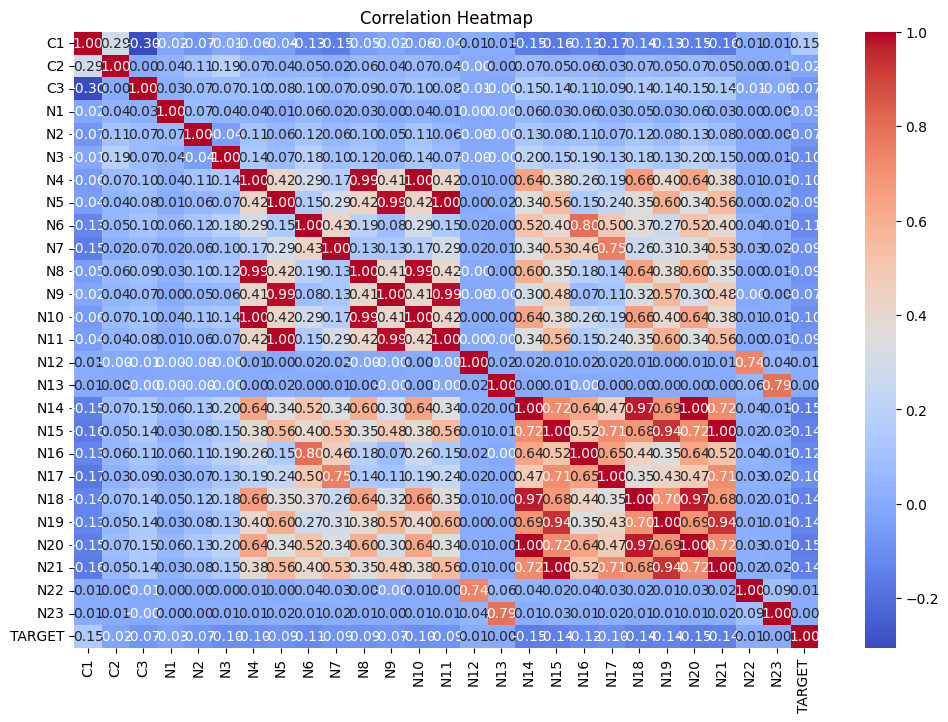

In [11]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Standardization and PCA

In [12]:
X = df_train.drop(columns=['TARGET'])
y = df_train['TARGET']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

### SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_pca, y)
#test
X_test = df_test
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)

results = []


for name, model in models.items():
    scores_1 = cross_val_score(model, X_res, y_res, cv=cv, scoring=f1)
    results.append({'Model': name, 'F1 Score Mean': scores_1.mean(), 'F1 Score Std': scores_1.std()})

In [17]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  F1 Score Mean  F1 Score Std
0  Logistic Regression       0.776912      0.000616
1        Random Forest       0.946402      0.000546
2        Decision Tree       0.893018      0.000398


### RandomOverSampler

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_pca, y)
results_1 = []


for name, model in models.items():
    scores_2 = cross_val_score(model, X_train_ros, y_train_ros, cv=cv, scoring=f1)
    results_1.append({'Model': name, 'F1 Score Mean': scores_2.mean(), 'F1 Score Std': scores_2.std()})

In [19]:
results_df_1 = pd.DataFrame(results_1)
print(results_df_1)

                 Model  F1 Score Mean  F1 Score Std
0  Logistic Regression       0.773012      0.000927
1        Random Forest       0.991081      0.000173
2        Decision Tree       0.977010      0.000336


### ADASYN

In [20]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_pca, y)

In [21]:
results_2 = []
for name, model in models.items():
    scores_3 = cross_val_score(model, X_res_adasyn, y_res_adasyn, cv=cv, scoring=f1)
    results_2.append({'Model': name, 'F1 Score Mean': scores_3.mean(), 'F1 Score Std': scores_3.std()})

In [22]:
results_df_2 = pd.DataFrame(results_2)
print(results_df_2)

                 Model  F1 Score Mean  F1 Score Std
0  Logistic Regression       0.750093      0.001035
1        Random Forest       0.946362      0.000416
2        Decision Tree       0.888047      0.000940


### Tuning RandomForest 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


random_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)


random_search.fit(X_train_ros, y_train_ros)


best_rf = random_search.best_estimator_

print(f'Best Parameters for Tuned Random Forest: {random_search.best_params_}')


kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = cross_val_score(best_rf, X_train_ros, y_train_ros, cv=kf, scoring='f1_weighted')

print(f'Tuned Random Forest F1: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
best_rf.fit(X_train_ros, y_train_ros)
y_test_pred = best_rf.predict(X_test_pca)

predictions = pd.DataFrame(y_test_pred, columns=['TARGET'])
print(predictions)

## Task 2 (Clustering with any dataset (30% of mark))
1. Select any dataset that will suit for clustering
2. Observe your data
3. Apply some data preparation
4. Apply clustering model
5. Visualise your obtained clusters

## Marking scheme
1. Data Preparation - 20%
2. Kmeans model - 30%
3. Visualisation - 20%
4. Code quality - 10%
5. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df.head()

In [ ]:
print(df.dtypes)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
categorical_columns = ['Ever_Married', 'Graduated','Profession', 'Var_1']

for column in categorical_columns:
    if df[column].isnull().sum() > 0: 
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

In [ ]:
numerical_columns = ['Age', 'Family_Size', 'Work_Experience']

for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_columns = ['Gender', 'Ever_Married', 'Graduated']
onehot_columns = ['Profession', 'Var_1', 'Spending_Score']

def label_encode_columns(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df


def onehot_encode_columns(df, columns):
    df = pd.get_dummies(df, columns=columns)
    return df


df = label_encode_columns(df, label_columns)
df = onehot_encode_columns(df, onehot_columns)


df.to_csv('encoded_dataset.csv', index=False)
print(df.head())

In [ ]:
columns_to_standardize = ['Age', 'Work_Experience', 'Family_Size']
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.to_csv('standardized_data.csv', index=False)
df.head()

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

homogeneity = metrics.homogeneity_score(df['Cluster'], kmeans.labels_)
completeness = metrics.completeness_score(df['Cluster'], kmeans.labels_)
v_measure = metrics.v_measure_score(df['Cluster'], kmeans.labels_)
adjusted_rand = metrics.adjusted_rand_score(df['Cluster'], kmeans.labels_)
silhouette = metrics.silhouette_score(df_pca, kmeans.labels_, sample_size=1000)

print("Homogeneity: %0.3f" % homogeneity)
print("Completeness: %0.3f" % completeness)
print("V-measure: %0.3f" % v_measure)
print("Adjusted Rand-Index: %.3f" % adjusted_rand)
print("Silhouette Coefficient: %0.3f" % silhouette)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Plot with Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
cluster_sizes = df['Cluster'].value_counts()
cluster_centers = kmeans.cluster_centers_

print("Cluster Sizes:")
print(cluster_sizes)
print("Cluster Centroids:")
print(cluster_centers)